In [1]:
#import spikeinterface modules
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
import glob

#import everything else
import os
import sys
import numpy as np
import neo
import pandas as pd
import h5py
import McsPy
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_
import matplotlib.pyplot as plt
from time import strftime
%matplotlib notebook

In [2]:
filedirec = r"D:\Files_Reutlingen_Jenny\main_191021extra"
inputdirectory = r"D:\Files_Reutlingen_Jenny\main_191021extra\191021_extra"
os.chdir(inputdirectory)

In [3]:
filelist = glob.glob('*.h5')
filelist

['aCSF_adult_15min_spont.h5',
 'hCSF_adult_20min_spont0002.h5',
 'hCSF_child_20min_spont.h5']

In [4]:
filename=filelist[0]


In [14]:
recording_MEA=se.MCSH5RecordingExtractor(os.path.join(filedirec, filename))
recording_f = st.preprocessing.bandpass_filter(recording_MEA, freq_min=150, freq_max=5000, filter_type='butter', order=2)
recording_cmr = st.preprocessing.common_reference(recording_f, reference='median')


In [15]:
recording_cmrprobe=recording_MEA.load_probe_file(probe_file="C:/Users/User/Documents/JO/gitkraken/MEA_analysis/Spikesorting/MCS_MEA_256_100µM_spacing.prb")

In [8]:
timestr = strftime("%d%m%Y")
outputdirectory = os.path.join(filedirec, '_output_Spikesorting_'+ timestr).replace('\\','/')

probe_file="C:/Users/User/Documents/JO/gitkraken/MEA_analysis/Spikesorting/MCS_MEA_256_100µM_spacing.prb"
outputdirectory_SC='D:/Files_Reutlingen_Jenny/main_191021extra/191021_extra_Spikesorting/output_Spykingcirucs'


In [9]:
outputdirectory

'D:/Files_Reutlingen_Jenny/main_191021extra/_output_Spikesorting_16042021'

In [10]:
outpath=os.path.join(outputdirectory+'_'+filename.split('.')[0]+'_spikesorting').replace("\\","/")
try:
    os.mkdir(outpath)
except OSError:
    print ("Creation of the directory %s failed" % outpath)
else:
    print ("Successfully created the directory %s " % outpath)

Creation of the directory D:/Files_Reutlingen_Jenny/main_191021extra/_output_Spikesorting_16042021_aCSF_adult_15min_spont_spikesorting failed


In [11]:
outpath_SC=os.path.join(outpath, 'output_spykingcircus').replace("\\","/")
try:
    os.mkdir(outpath_SC)
except OSError:
    print ("Creation of the directory %s failed" % outpath)
else:
    print ("Successfully created the directory %s " % outpath)

Creation of the directory D:/Files_Reutlingen_Jenny/main_191021extra/_output_Spikesorting_16042021_aCSF_adult_15min_spont_spikesorting failed


In [12]:
os.chdir(outpath)

In [21]:
# cutting out 2 minutes

fs = recording_cmrprobe.get_sampling_frequency()
recording_sub = se.SubRecordingExtractor(recording_cmrprobe, start_frame=200*fs, end_frame=320*fs)

In [45]:

recording_cache = se.CacheRecordingExtractor(recording_cmrprobe)

<IPython.core.display.Javascript object>


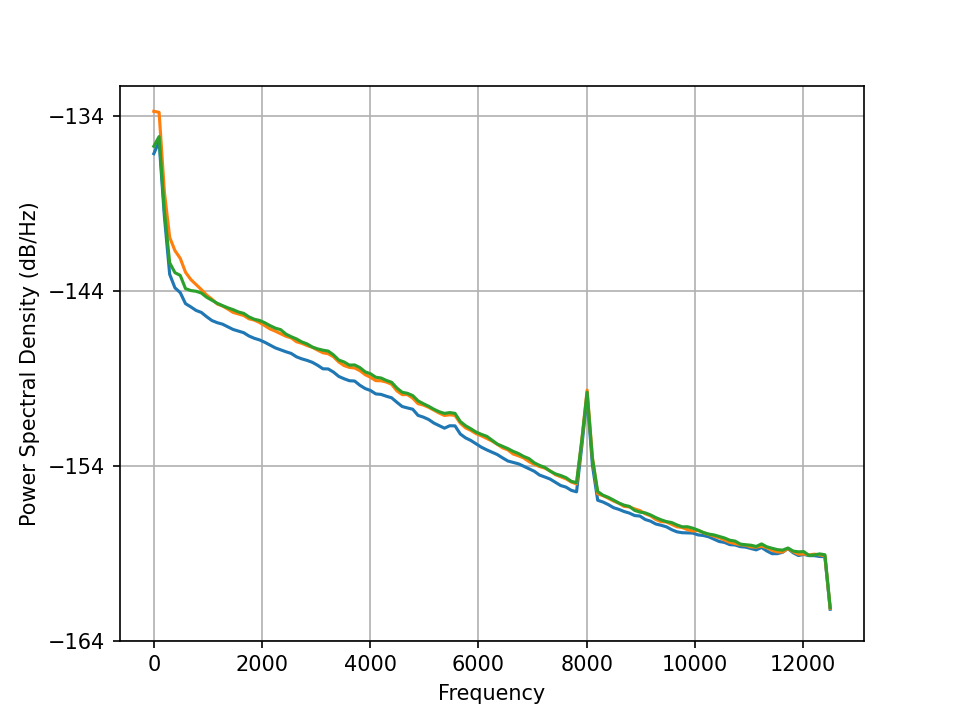

In [23]:
w_sp = sw.plot_spectrum(recording_sub, channels=[0, 1, 2])


In [24]:

print(f'Cached channels: {recording_cache.get_channel_ids()}')
print(f'Cached channels ids: {recording_cache.get_channel_ids()}')
print(f'Channel groups after caching: {recording_cache.get_channel_groups()}')

Cached channels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [57]:
recording_cache.filename


'C:\\Users\\User\\AppData\\Local\\Temp\\tmpqvearxr0\\tmph5y9q8fu.dat'

In [58]:
recording_cache.get_tmp_folder()


WindowsPath('C:/Users/User/AppData/Local/Temp/tmpqvearxr0')

In [59]:
outpath

'D:/Files_Reutlingen_Jenny/main_191021extra/_output_Spikesorting_16042021_aCSF_adult_15min_spont_spikesorting'

In [60]:
recording_cache.move_to('filtered_data.dat') 
print(recording_cache.filename)

filtered_data.dat


In [61]:
recording_cache.dump_to_dict()


{'class': 'spikeextractors.extractors.bindatrecordingextractor.bindatrecordingextractor.BinDatRecordingExtractor',
 'module': 'spikeextractors',
 'kwargs': {'file_path': 'D:\\Files_Reutlingen_Jenny\\main_191021extra\\_output_Spikesorting_16042021_aCSF_adult_15min_spont_spikesorting\\filtered_data.dat',
  'sampling_frequency': 24999.999999999996,
  'numchan': 252,
  'dtype': 'float64',
  'recording_channels': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85

In [62]:
recording_cache.dump_to_pickle('recording.pkl')


In [20]:
# to load:
recording_loaded = se.load_extractor_from_pickle('recording.pkl')
recording_cache=recording_loaded

In [46]:
fs = recording_cache.get_sampling_frequency()
recording_sub = se.SubRecordingExtractor(recording_cache, start_frame=200*fs, end_frame=320*fs)

In [48]:
recording_sub

In [68]:
sorting_SC = ss.run_spykingcircus(recording_cmrprobe, output_folder=outpath_SC)

RUNNING SHELL SCRIPT: D:\Files_Reutlingen_Jenny\main_191021extra\_output_Spikesorting_16042021_aCSF_adult_15min_spont_spikesorting\output_spykingcircus\run_spykingcircus.bat


In [36]:
#load
sorting_SC = se.SpykingCircusSortingExtractor(outpath_SC)


In [37]:
sorting_SC

In [41]:
recording_cache

In [49]:
waveforms = st.postprocessing.get_unit_waveforms(
    recording_sub, sorting_SC, memmap = True
    )

ValueError: cannot mmap an empty file

In [27]:
len(waveforms)

502

<IPython.core.display.Javascript object>


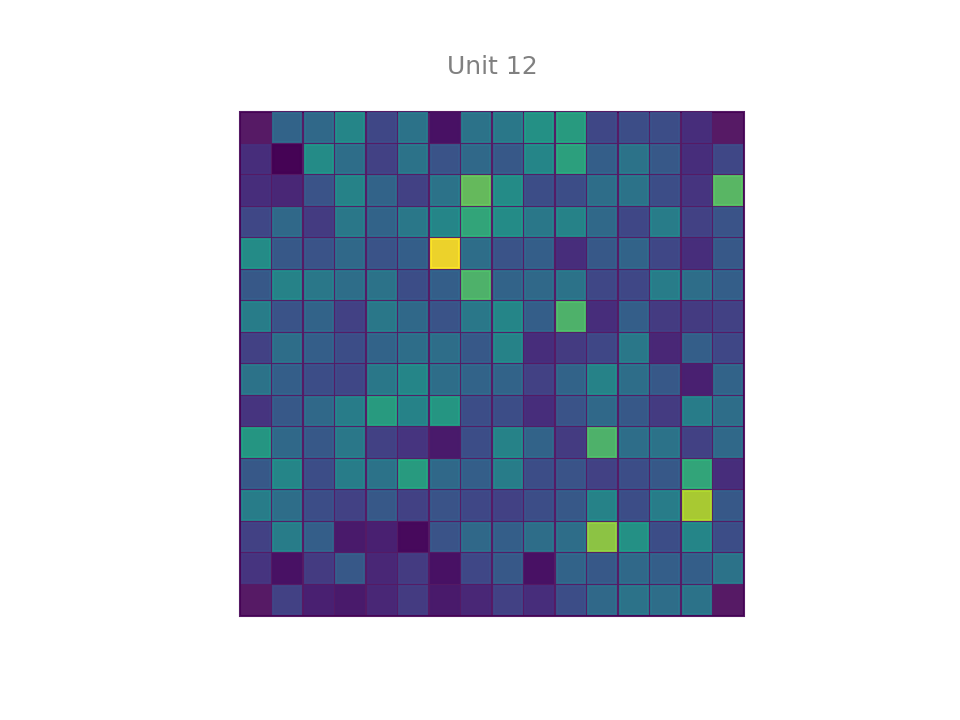

In [29]:
sw.plot_unit_template_maps(recording_cache,  sorting_SC, max_spikes_per_unit=100, unit_ids=[12])

<IPython.core.display.Javascript object>


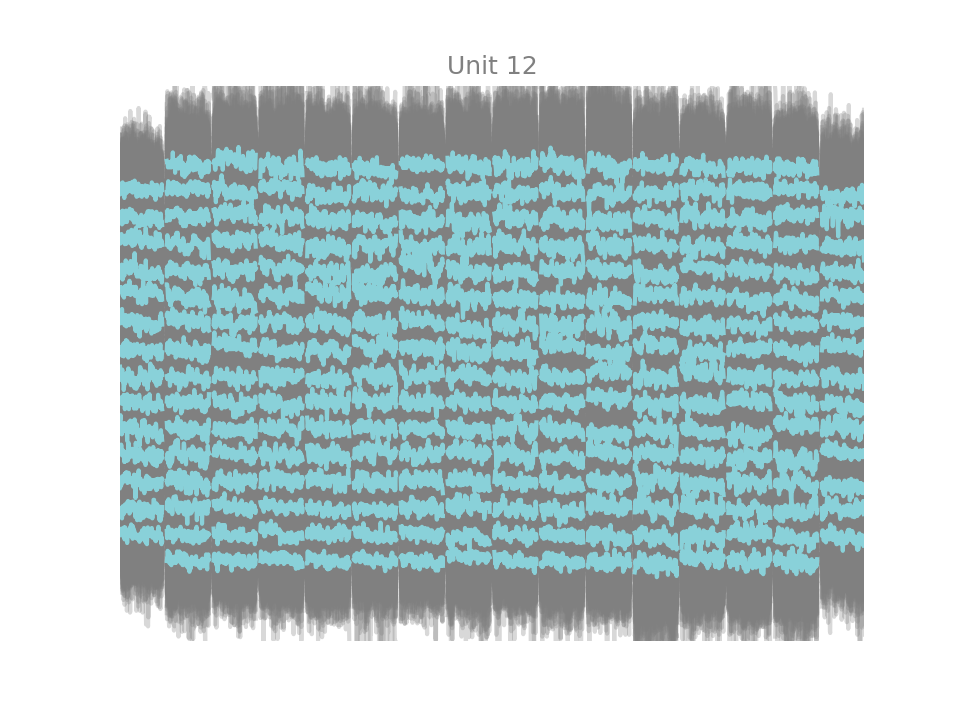

{}


In [30]:
w_wf = sw.plot_unit_waveforms(recording_cache, sorting_SC, unit_ids=[12], color='#89D1D9')

<IPython.core.display.Javascript object>


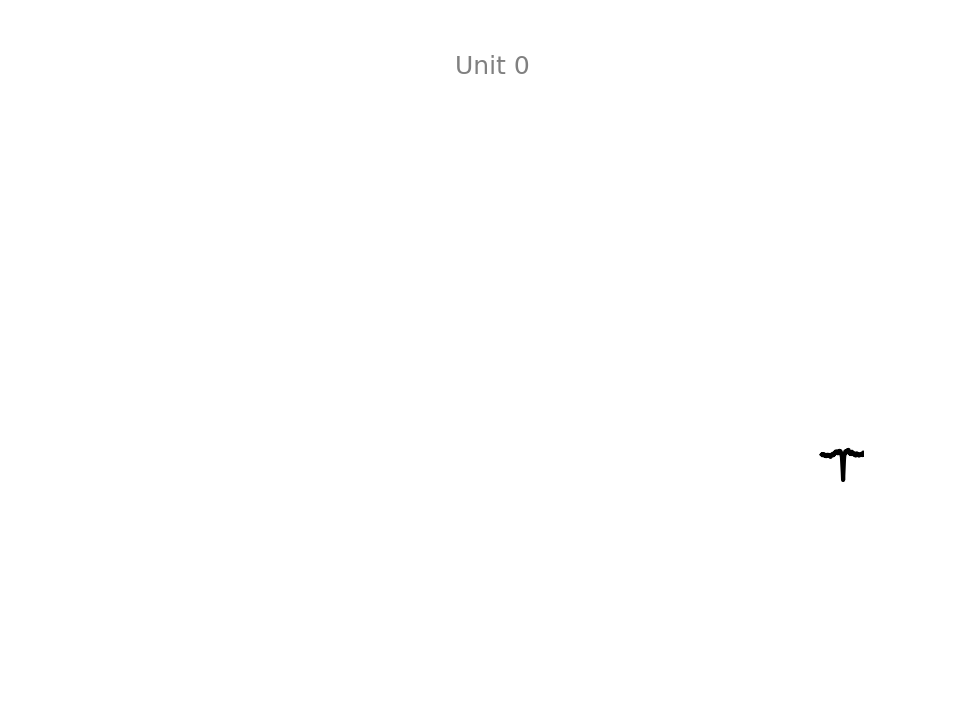

{}


In [102]:
sw.plot_unit_templates(recording_cache, sorting_SC, unit_ids=[0], max_channels=1)

In [31]:
len(sorting_SC.get_unit_ids())

502

In [32]:
sorting_SC.get_unit_ids().index(2)

112

In [33]:
sorting_SC.get_unit_ids()[112]

2

In [34]:
type(sorting_SC.get_unit_spike_train(1))

numpy.ndarray

In [82]:
sorting_SC.get_unit_spike_train(0)

array([  200103,   367965,   584916,   674090,   674328,   674553,
         779408,  1101633,  1117752,  1432917,  1433656,  1433749,
        1433766,  1799748,  1973419,  2143930,  2609715,  2681993,
        2949296,  3037803,  3038706,  3247445,  3247745,  3285851,
        3511836,  3512879,  3726841,  4034166,  4034547,  4034845,
        4298469,  4344850,  4825352,  4932678,  4933392,  5479907,
        5480179,  5480726,  5637046,  5637582,  5638439,  6054295,
        6853244,  6939562,  7414155,  7610130,  7663189,  7787956,
        7922767,  8458107,  8458410,  8818244,  9009029,  9344635,
        9345401,  9347294,  9389162,  9452069,  9452603,  9645668,
        9741964,  9744362,  9800492,  9849117, 10224730, 10676578,
       10944110, 10959161, 11195562, 11859970, 11860238, 11860604,
       11887112, 12214907, 12329539, 12926644, 12972597, 13437918,
       13882852, 13947163, 14489502, 14641935, 14798551, 14798713,
       14911554, 15073855, 15207617, 15541794, 16371111, 16373

In [43]:
waveforms = st.postprocessing.get_unit_waveforms(recording_cache, sorting_SC, verbose=True)


In [44]:
st.postprocessing.get_template_features_list()


['peak_to_valley',
 'halfwidth',
 'peak_trough_ratio',
 'repolarization_slope',
 'recovery_slope']

In [83]:
st.validation.get_quality_metrics_list()

['num_spikes',
 'firing_rate',
 'presence_ratio',
 'isi_violation',
 'amplitude_cutoff',
 'snr',
 'max_drift',
 'cumulative_drift',
 'silhouette_score',
 'isolation_distance',
 'l_ratio',
 'd_prime',
 'noise_overlap',
 'nn_hit_rate',
 'nn_miss_rate']

In [ ]:
features = st.postprocessing.compute_unit_template_features(
    recording_cache, sorting_SC, as_dataframe=True, upsampling_factor=10
    )

In [55]:
features

,peak_to_valley,halfwidth,peak_trough_ratio,repolarization_slope,recovery_slope
0,0.000744,0.000124,-0.265574,0.075042,-0.000977
1,0.000820,0.000328,-0.474439,0.027238,-0.002525
10,0.000916,0.000316,-0.314959,0.039820,-0.008185
100,0.000548,0.000248,-0.086883,0.046373,-0.001005
101,0.002952,0.000232,0.015183,NaN,NaN
...,...,...,...,...,...
95,0.000616,0.000284,-0.342646,0.052901,-0.008465
96,0.000376,0.000196,-0.217725,0.053803,-0.001766
97,0.000484,0.000172,-0.412964,0.056041,-0.006332
98,0.001016,0.000332,-0.178314,0.190320,-0.016595


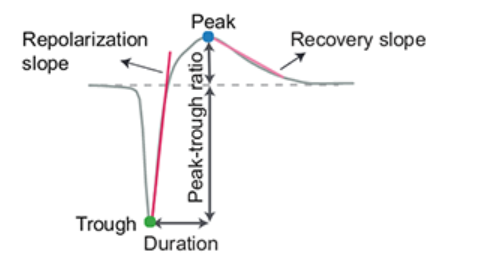

In [53]:

duration = recording_cache.get_num_frames()
isi_violations = st.validation.compute_isi_violations(sorting_SC, duration_in_frames=duration)
print('ISI violations:', isi_violations)



ISI violations: [1.27377826e+00 0.00000000e+00 0.00000000e+00 3.97387959e+00
 4.78976141e+00 0.00000000e+00 3.59827283e+00 1.79616053e+00
 3.51914414e-01 0.00000000e+00 1.58361486e+00 0.00000000e+00
 2.42349941e-01 4.32457803e-01 0.00000000e+00 3.19881806e-01
 1.57278965e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.19348108e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.91155850e+00 3.60251586e+00 9.52475696e+00
 3.67714653e+00 0.00000000e+00 0.00000000e+00 1.21621622e+01
 0.00000000e+00 0.00000000e+00 1.82654540e-01 0.00000000e+00
 0.00000000e+00 2.41169188e-01 6.08846639e-01 3.81035977e-01
 0.00000000e+00 0.00000000e+00 5.34887816e+00 1.20512903e+01
 1.76544668e+01 0.00000000e+00 4.86036797e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.95903716e+01 0.00000000e+00
 7.46754233e-01 8.35294212e+00 3.82133477e+00 0.00000000e+00
 1.39850567e+00 0.00000000e+00 6.02564515e+00 1.32883014e+00
 0.00000

In [58]:
snrs = st.validation.compute_snrs(sorting_SC, recording_cache)
print('SNRs:', snrs)

SNRs: [ 3.68636627  4.99554308  3.18057177  4.21515235  6.48695524 16.47788306
  6.74698088  3.09740276  3.54200631 19.45265132  6.05161192  6.83005729
  3.14511229  3.73828337  2.63011315  3.10949338  3.39905298 10.83804256
  9.25282723 10.05141044 10.31362115  4.25121935  4.28870312  2.84686789
  4.35701429 12.63011502 28.11184901 18.85550848 19.49441414 18.82434235
  3.83343396  9.16284214  6.9188808   3.41460294  5.7906752   2.68313285
 49.35861244 51.28883751  5.57954422  7.9454734   5.8452368   5.54158814
  5.37711178  3.21348321  3.35282604 19.21169203  4.33715866 16.37826537
  6.91144262 10.2215205   5.74629521  6.67544271 10.97788751 23.47493722
 19.81564139 19.25011385  5.76616313  7.51953204  3.50755759 12.44160584
  3.03998822 25.88247795  2.56383036  3.52831893 10.8603286   3.89303387
  4.13596312  3.34654212  7.89550864 10.04673394  3.63228073 11.1286899
  9.67577761  2.50395523  8.84112586  3.29883371  3.45798832  5.09267642
  3.18673465 11.68213013  7.05618529  3.511738

In [59]:
len(snrs)

502

In [61]:

quality_metrics = st.validation.compute_quality_metrics(sorting_SC, recording_cache, 
                                                        metric_names=['firing_rate', 'isi_violation', 'snr'], 
                                                        as_dataframe=True)
display(quality_metrics)

,firing_rate,isi_violation,snr
0,2.575000,1.273778,3.686366
1,0.258333,0.000000,4.995543
10,3.833333,0.000000,3.180572
100,6.991667,3.973880,4.215152
101,0.766667,4.789761,6.486955
...,...,...,...
95,3.008333,0.311082,3.359212
96,2.425000,1.436233,3.734944
97,3.483333,1.160131,2.839442
98,0.200000,0.000000,23.745528


In [66]:
quality_metrics['isi_violation'].min()

0.0

In [54]:
st.postprocessing.export_to_phy(recording_cache, 
                                sorting_SC, output_folder='phy_IC', verbose=True, recompute_info=True)

You can run spiketoolkit.preprocessing.bandpass_filter(recording, cache_to_file=True)
Converting to Phy format
Recomputing info
Number of chunks: 13 - Number of jobs: 1


Extracting waveforms in chunks: 100%|##################################################| 13/13 [00:33<00:00,  2.56s/it]


Fitting PCA of 3 dimensions on 10000 waveforms
Projecting waveforms on PC
Saving files
Saved phy format to:  D:\Files_Reutlingen_Jenny\191021_extra\phy_IC
Run:

phy template-gui  D:\Files_Reutlingen_Jenny\191021_extra\phy_IC\params.py


# AUTOMATED CURATION


In [55]:
snr_thresh = 5
isi_viol_thresh = 0.5

In [56]:

sorting_auto = st.curation.threshold_isi_violations(sorting_SC, isi_viol_thresh, 'greater', duration)

In [59]:
len(sorting_auto.get_unit_ids())

277

In [61]:
len(sorting_SC.get_unit_ids())

502